   ### Author : Pranay Waghmare
   ### TSF Data Science and Business Analytics Internship TASK 6
   ### Prediction using Decsion Tree Algorithm

### Objective

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

### Importing the required packages

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

### Reading and Importing the data 
Data can be found at https://bit.ly/3kXTdox

In [83]:
iris_dataset =  pd.read_csv('iris.csv')

In [84]:
iris_dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Pre-processing

In [86]:
iris_dataset.drop('Id',axis=1,inplace=True)

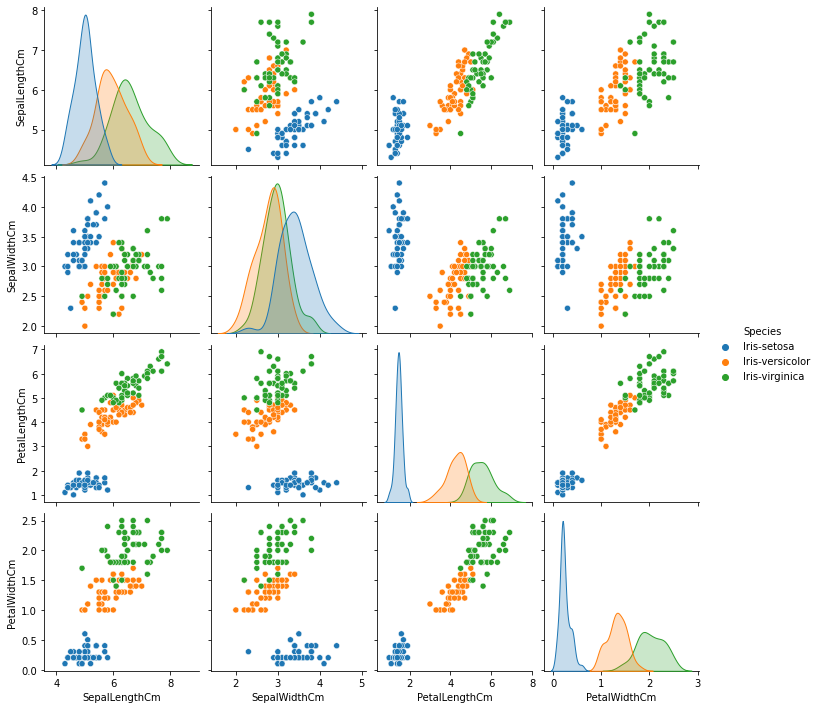

In [87]:
import seaborn as sns 
sns.pairplot(iris_dataset,  hue = "Species")

In [88]:
x = iris_dataset.iloc[:, [0, 1, 2, 3]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Target Variable

In [89]:
y = iris_dataset["Species"]
y[0:5]


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Setting up the Decision Tree

 We will be using train/test split on our decision tree. 
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [90]:
from sklearn.model_selection import train_test_split

In [103]:
TrainX, TestX, TrainY, TestY, = train_test_split(x, y, test_size=0.3, random_state=3)

### Modeling
We will first create an instance of the DecisionTreeClassifier called IrisTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [104]:
IrisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
IrisTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Fit the data to the model

In [105]:
IrisTree.fit(TrainX, TrainY)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [106]:
predTree = IrisTree.predict(TestX)

In [107]:
print(predTree[0:5])
print(TestY[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


### Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [108]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", "%.2f" % metrics.accuracy_score(TestY, predTree))

DecisionTrees's Accuracy:  0.98


### Visualization


<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)>

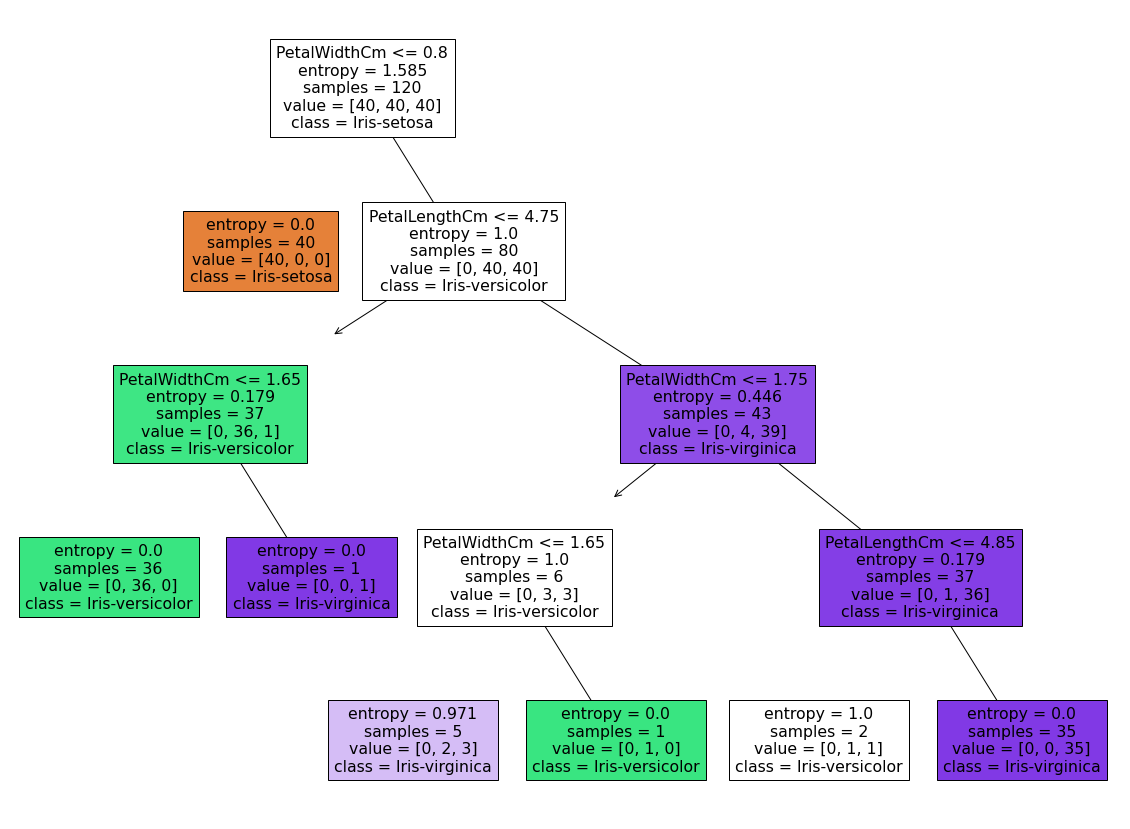

In [102]:
classname=np.unique(iris_dataset.Species)
featureNames = iris_dataset.columns[0:4]
plt.figure(figsize=(20,15))
plot_tree(IrisTree,feature_names=featureNames,class_names = classname,filled = True)
plot_tree